# Lab | Time Series Analysis

## Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [111]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [112]:
# Run this code:

sensor = pd.read_csv('../data/sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [113]:
# Your code here:
display(sensor.head())


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


In [114]:
#Check info
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [115]:
# Your code here:
#Checking if there are missing data
missing_values= sensor.isna().sum()
missing_values


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [116]:
# Your code here:
rows, columns = sensor.shape
print(f'There are {rows} rows and {columns} columns')

There are 1751 rows and 12 columns


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [134]:
# Your code here:

time_index= pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=len(sensor))


Assign the time series index to the dataframe's index.

In [136]:
# Your code here:

sensor.index = time_index
sensor

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
2018-01-01 00:29:09,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](./images/tsa_decompose.png)

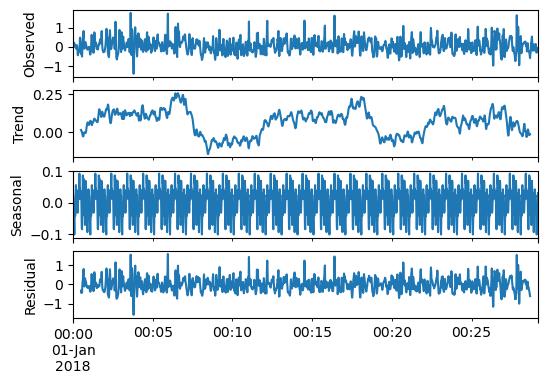

In [161]:
# Your code here:

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Decompose the time series
decomposed_acc = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], model='additive', period=60)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6,4), sharex=True)
decomposed_acc.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposed_acc.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposed_acc.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposed_acc.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.show()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

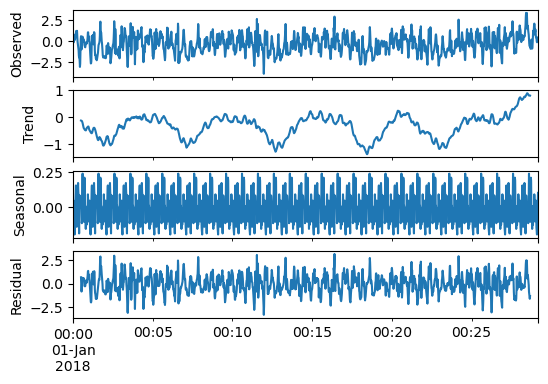

In [159]:
# Decompose the time series
decomposed_rot = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], model='additive', period=60)

#Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6,4), sharex=True)
decomposed_rot.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposed_rot.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposed_rot.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposed_rot.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.show()

## Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

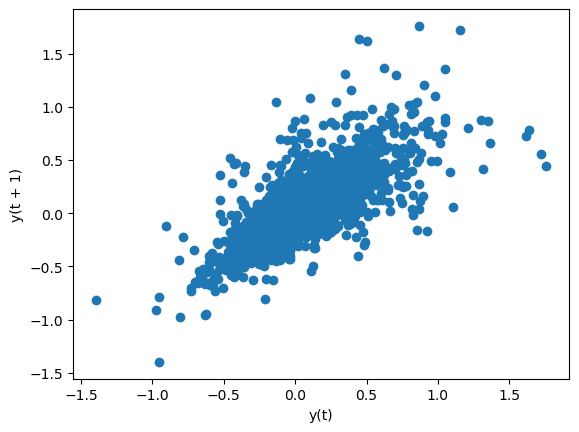

In [121]:
# Your code here:
from pandas.plotting import lag_plot

lag_plot(sensor['userAcceleration.x'])


Create a lag plot for `rotationRate.x`

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

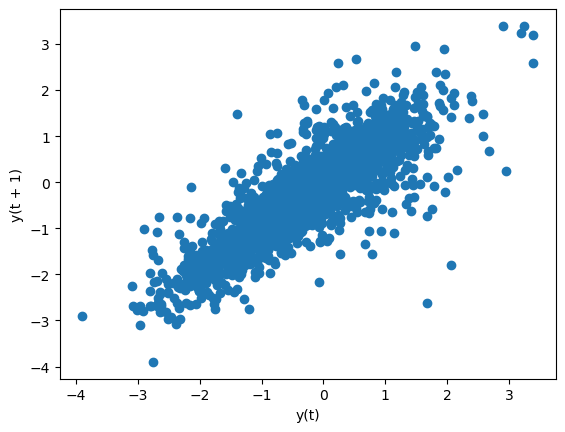

In [122]:
# Your code here:

lag_plot(sensor['rotationRate.x'])

What are your conclusions from both visualizations?

In [ ]:
# Your conclusions here:
#Both userAcceleration.x and rotationRate.x exhibit strong positive autocorrelation, forming an upward diagonal pattern in the lag plots. 
# This means current values are highly influenced by previous values, making them ideal for time series forecasting models like ARIMA. 
# Minor noise is present, but the overall trend shows clear dependency on past data.


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [167]:
# Your code here:

from statsmodels.tsa.stattools import adfuller

def adf_test(series, title):
    print(f'\nAdf Test for{title}')
    result = adfuller(series.dropna())

    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    if result[1] < 0.05:
        print("The series is Stationary (reject null hypothesis)")
    else:
        print("The series is Non-stationary (fail to reject null hypothesis)")


# Perform the ADF test
adf_test(sensor['userAcceleration.x'], ' User Acceleration X:')
adf_test(sensor['rotationRate.x'], ' Rotation Rate X:')


Adf Test for User Acceleration X:
ADF Statistic: -17.9580
p-value: 2.823439483037483e-30
Critical Values:
	1%: -3.4341
	5%: -2.8632
	10%: -2.5677
The series is Stationary (reject null hypothesis)

Adf Test for Rotation Rate X:
ADF Statistic: -5.2699
p-value: 6.320230335912861e-06
Critical Values:
	1%: -3.4341
	5%: -2.8632
	10%: -2.5677
The series is Stationary (reject null hypothesis)


What are your conclusions from this test?

In [125]:
#  Your conclusions here:

# The ADF test results show that both userAcceleration.x and rotationRate.x are stationary.
# Low p-values (0.0000)- This is far below the standard threshold (0.05), meaning we reject the null hypothesis. 
# The null hypothesis states that the series is non-stationary, so rejecting it confirms stationarity.
# ADF Statistic values (-17.9580 and -5.2699) - Both are much lower than their respective critical values at all confidence levels (1%, 5%, and 10%), 
# -which strongly supports the conclusion that the time series data is stationary.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [162]:
# Your code here:

from statsmodels.tsa.arima.model import ARIMA

train_size = sensor.shape[0] - 10
train, test = sensor['userAcceleration.x'][:train_size], sensor['userAcceleration.x'][train_size:]

arma_model = ARIMA(train, order=(2, 1, 0))
arma_result = arma_model.fit()

# Forecast last 10 values
forecast = arma_result.forecast(steps=10)

print(arma_result.summary())

                               SARIMAX Results                                
Dep. Variable:     userAcceleration.x   No. Observations:                 1741
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 202.283
Date:                Wed, 21 May 2025   AIC                           -398.567
Time:                        16:35:51   BIC                           -382.182
Sample:                    01-01-2018   HQIC                          -392.508
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4038      0.014     28.436      0.000       0.376       0.432
ar.L2         -0.3209      0.017    -18.662      0.000      -0.355      -0.287
sigma2         0.0464      0.001     51.454      0.0

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [169]:
# Your code here:
from statsmodels.tools.eval_measures import rmse

# Compare with actual values
error = rmse(test, forecast)
print(f'RMSE: {error}')

RMSE: 0.2969797844680033


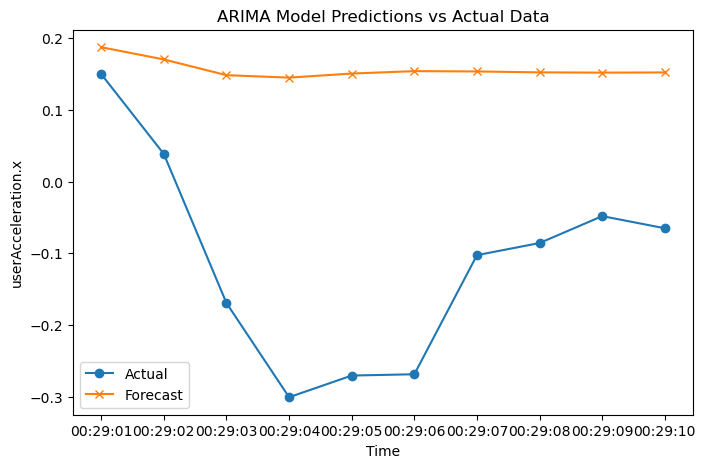

In [ ]:
#Plot of Predictions vs Actual Data
plt.figure(figsize=(8, 5))
plt.plot(test.index, test, label="Actual", marker='o')
plt.plot(test.index, forecast, label="Forecast", marker='x')
plt.xlabel('Time')
plt.ylabel('userAcceleration.x')
plt.legend()
plt.title(f"ARIMA Model Predictions vs Actual Data")
plt.show()